In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
# import seaborn as sns
# sns.set()
sys.path.append('../src/')
%matplotlib inline

## データの読み込み

In [7]:
data_dir = '../../data/'
file_list = os.listdir(data_dir)[1:5]

In [10]:
csv_ls = []
for i in range(len(file_list)):
    tmp = pd.read_csv(data_dir+file_list[i], header=None)
    csv_ls.append(tmp)

In [8]:
dic_coco = {}
dic_coco[0] = "Nose"
dic_coco[1] = "Neck"
dic_coco[2] = "RShoulder"
dic_coco[3] = "RElbow"
dic_coco[4] = "RWrist"
dic_coco[5] = "LShoulder"
dic_coco[6] = "LElbow"
dic_coco[7] = "LWrist"
dic_coco[8] = "RHip"
dic_coco[9] = "RKnee"
dic_coco[10] = "RAnkle"
dic_coco[11] = "LHip"
dic_coco[12] = "LKnee"
dic_coco[13] = "LAnkle"
dic_coco[14] = "REye"
dic_coco[15] = "LEye"
dic_coco[16] = "REar"
dic_coco[17] = "LEar"
dic_coco[18] = "Background"

## 動きの可視化

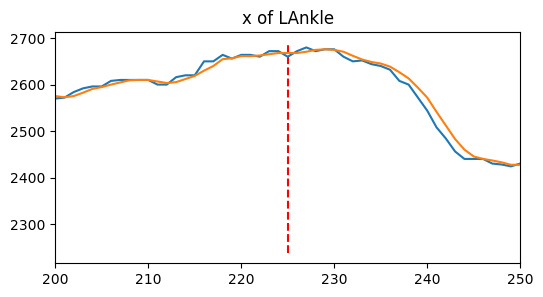

In [53]:
i = 13 * 3
df = csv_ls[2][i]
df_mva = df.rolling(window=3, min_periods=2).mean()
ymax = int(df.max()) + 10
ymin = int(df.min()) - 10
idx = i // 3

plt.clf()
plt.figure(figsize=(6, 3))
df.plot()
df_mva.plot()
plt.title('x of ' + dic_coco[idx])
plt.vlines([225], ymin, ymax, 'red', linestyles='dashed')
plt.xlim([200, 250])
plt.show()

0


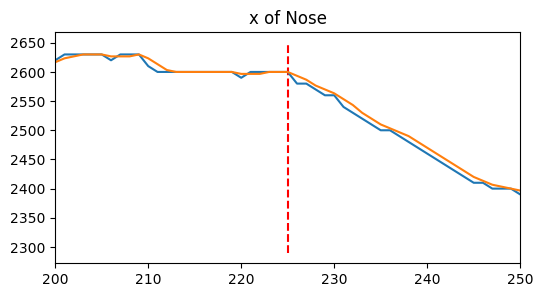

1


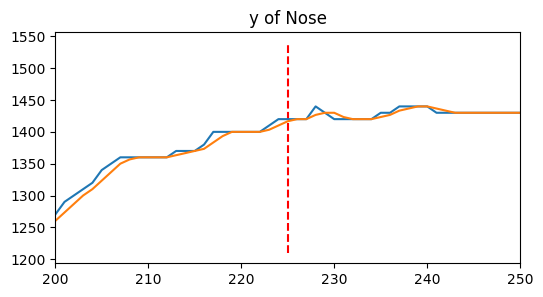

2
pass
3


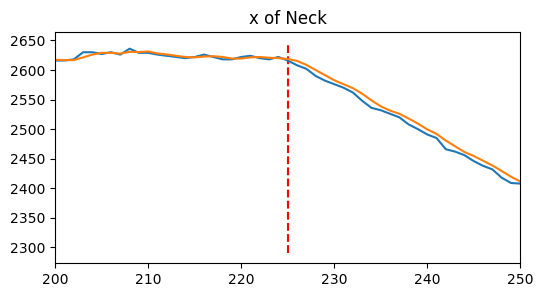

4


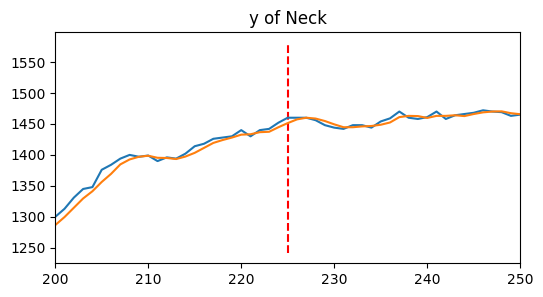

5
pass
6


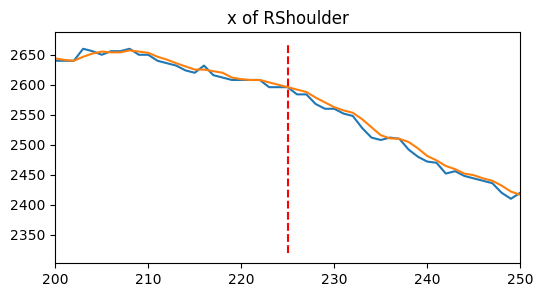

7


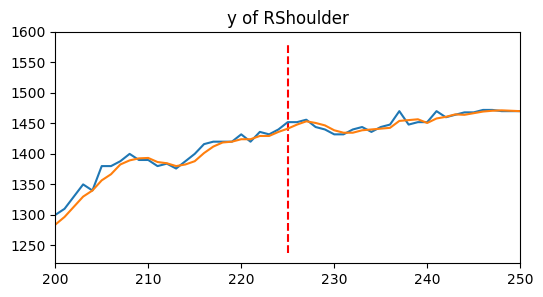

8
pass
9


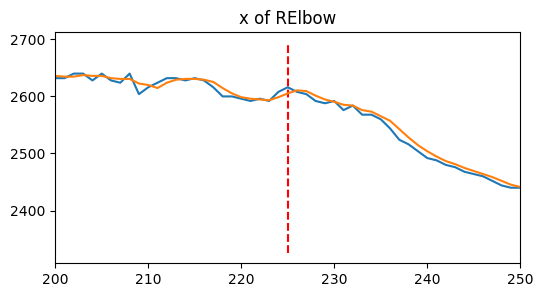

10


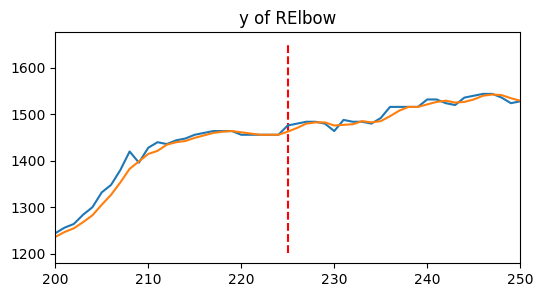

11
pass
12


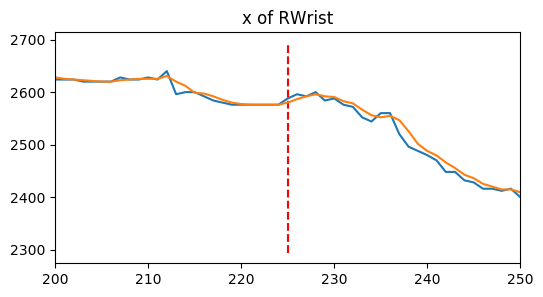

13


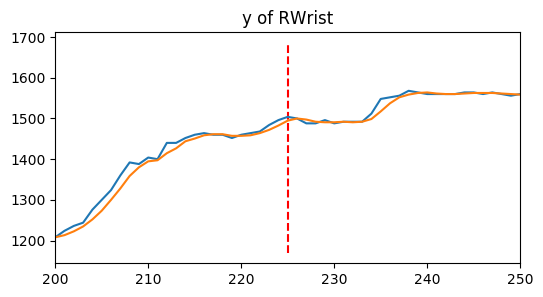

14
pass
15


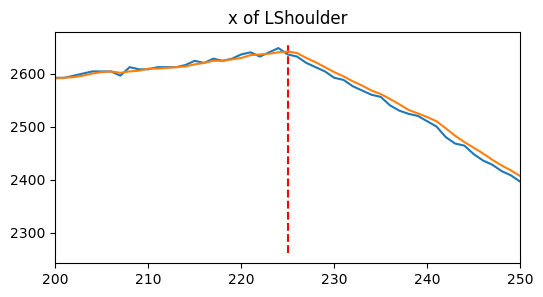

16


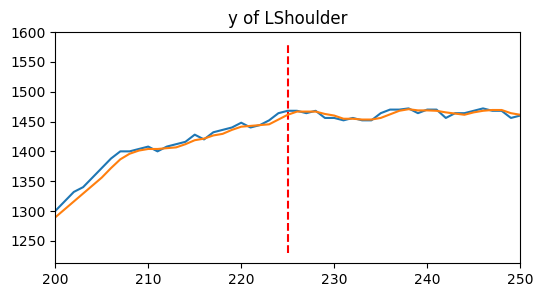

17
pass
18


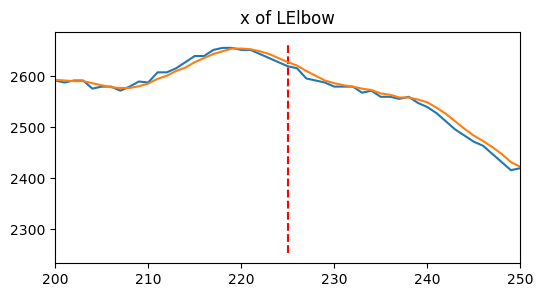

19


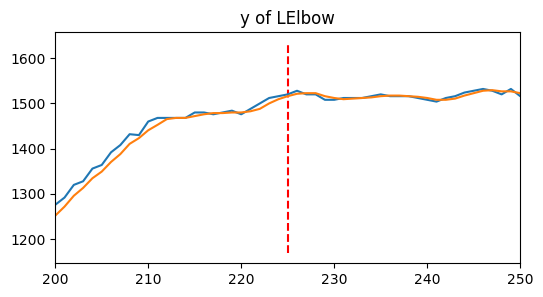

20
pass
21


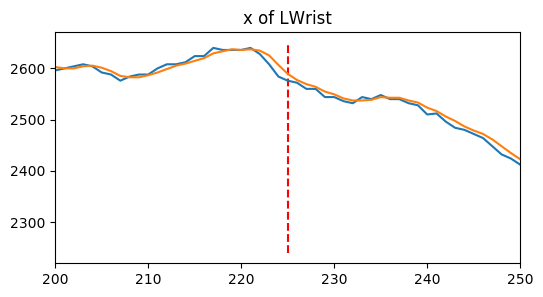

22


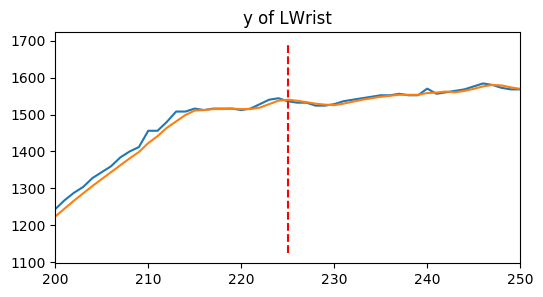

23
pass
24


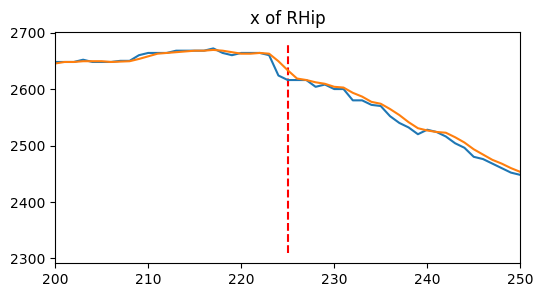

25


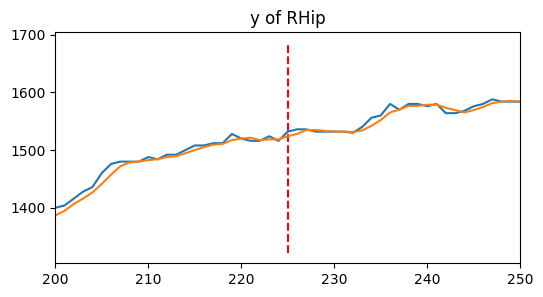

26
pass
27


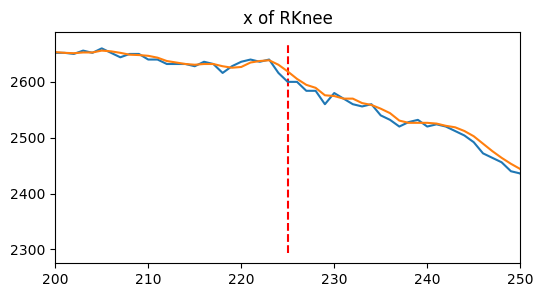

28


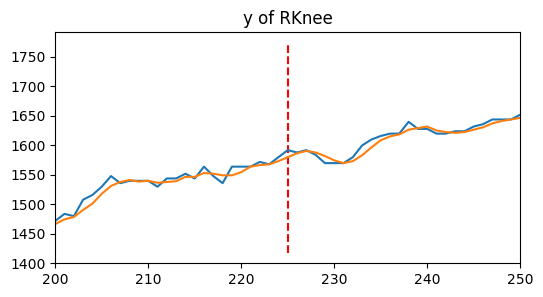

29
pass
30


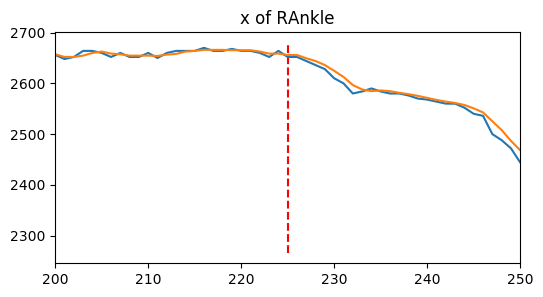

31


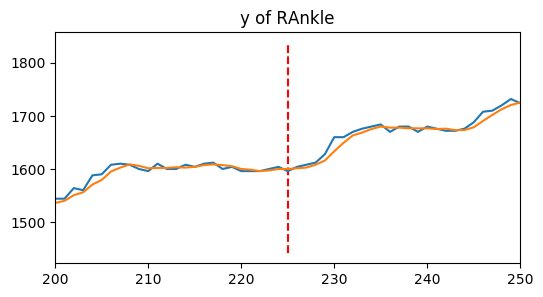

32
pass
33


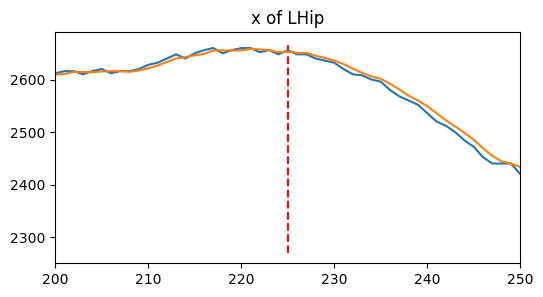

34


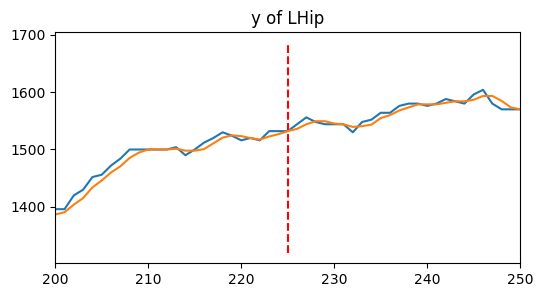

35
pass
36


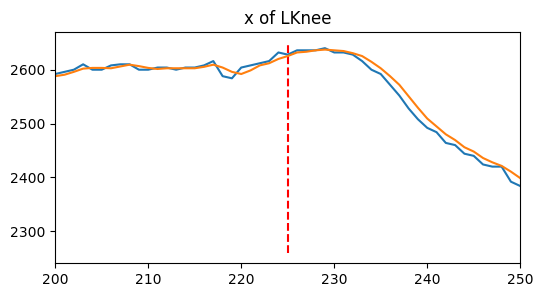

37


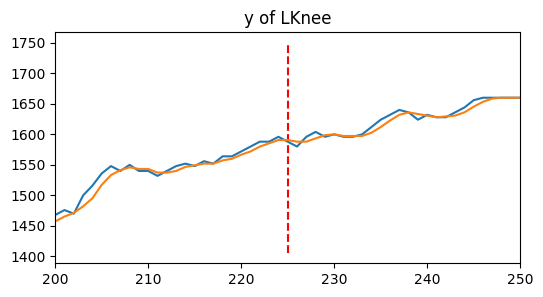

38
pass
39


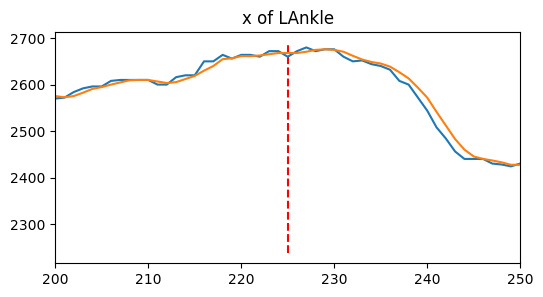

40


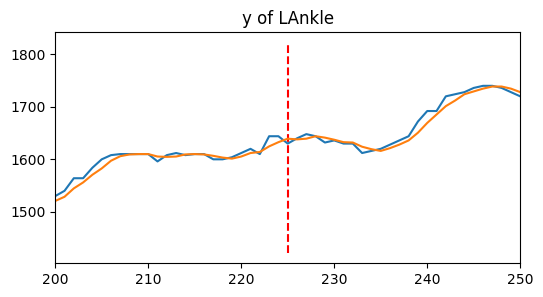

41
pass
42


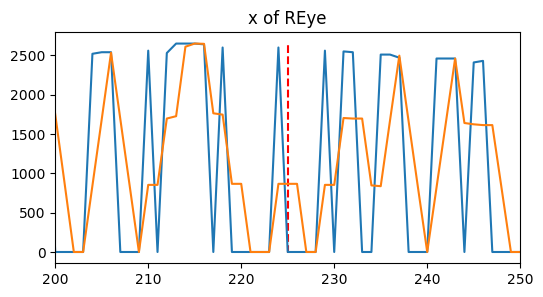

43


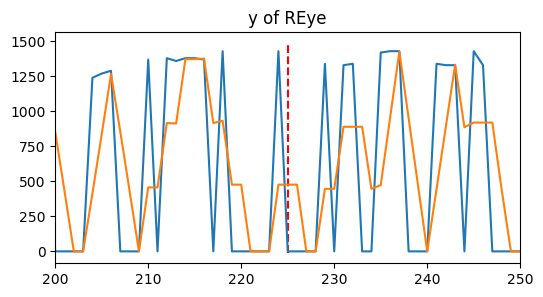

44
pass
45


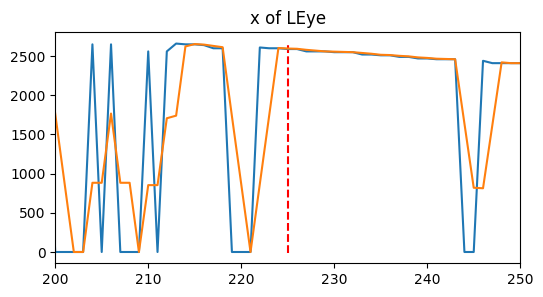

46


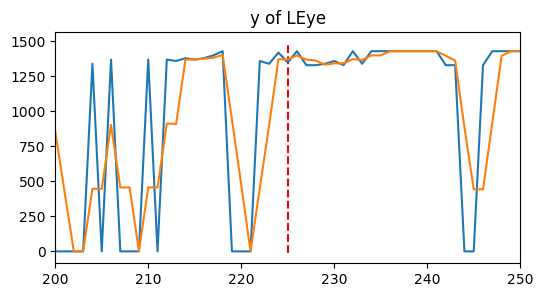

47
pass
48


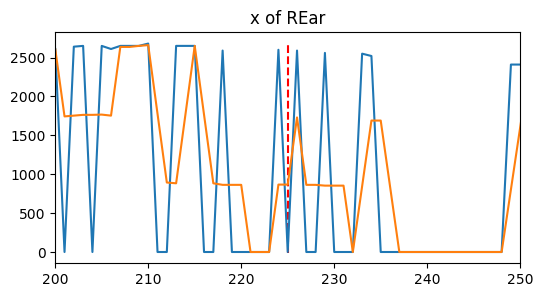

49


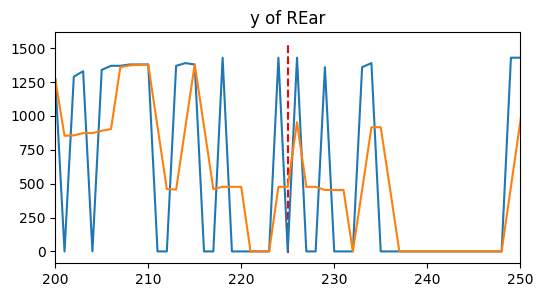

50
pass
51


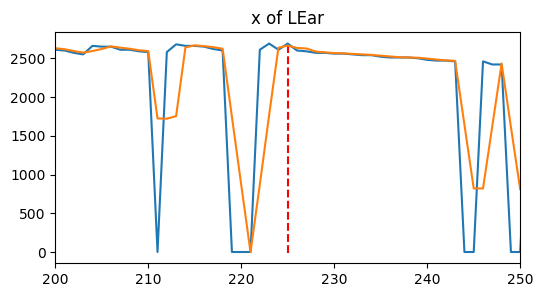

52


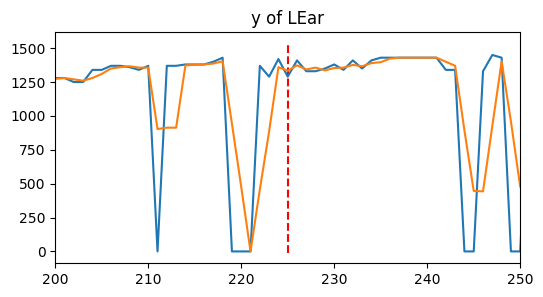

53
pass


In [56]:
plt.clf()
for i in range(csv_ls[2].shape[1]):  # range(54)
    print(i)
    df = csv_ls[2][i]
    df_mva = df.rolling(window=3, min_periods=2).mean()
    ymax = int(df.max()) + 10
    ymin = int(df.min()) - 10
    plt.figure(figsize=(6, 3))
    idx = i // 3
    if i % 3 == 0:
        df.plot()
        df_mva.plot()
        plt.title('x of ' + dic_coco[idx])
        plt.vlines([225], ymin, ymax, 'red', linestyles='dashed')
        plt.xlim([200, 250])
        plt.show()
    elif i % 3 == 1:
        df.plot()
        df_mva.plot()
        plt.title('y of ' + dic_coco[idx])
        plt.vlines([225], ymin, ymax, 'red', linestyles='dashed')
        plt.xlim([200, 250])
        plt.show()
    else:
        print('pass')

In [ ]:
# for i in range(len(csv_ls)):

print('csv number: ', str(i))
plt.clf()
plt.figure(figsize=(6, 3))
csv_ls[2][18].plot()
plt.show()

## 形式の違い
---
### OepnPose
[OpenPose output形式](https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#keypoint-ordering)
```
// Result for COCO (18 body parts)
// POSE_COCO_BODY_PARTS {
//     {0,  "Nose"},
//     {1,  "Neck"},
//     {2,  "RShoulder"},
//     {3,  "RElbow"},
//     {4,  "RWrist"},
//     {5,  "LShoulder"},
//     {6,  "LElbow"},
//     {7,  "LWrist"},
//     {8,  "RHip"},
//     {9,  "RKnee"},
//     {10, "RAnkle"},
//     {11, "LHip"},
//     {12, "LKnee"},
//     {13, "LAnkle"},
//     {14, "REye"},
//     {15, "LEye"},
//     {16, "REar"},
//     {17, "LEar"},
//     {18, "Background"},
// }
```

### 3d-pose-baseline
---
[入力形式](https://github.com/una-dinosauria/3d-pose-baseline/blob/master/src/data_utils.py#L20)
```
H36M_NAMES = ['']*32
H36M_NAMES[0]  = 'Hip'
H36M_NAMES[1]  = 'RHip'
H36M_NAMES[2]  = 'RKnee'
H36M_NAMES[3]  = 'RFoot'
H36M_NAMES[6]  = 'LHip'
H36M_NAMES[7]  = 'LKnee'
H36M_NAMES[8]  = 'LFoot'
H36M_NAMES[12] = 'Spine'
H36M_NAMES[13] = 'Thorax'
H36M_NAMES[14] = 'Neck/Nose'
H36M_NAMES[15] = 'Head'
H36M_NAMES[17] = 'LShoulder'
H36M_NAMES[18] = 'LElbow'
H36M_NAMES[19] = 'LWrist'
H36M_NAMES[25] = 'RShoulder'
H36M_NAMES[26] = 'RElbow'
H36M_NAMES[27] = 'RWrist'
```

## 関節の3次元位置を推定

In [3]:
# main
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import data_utils
import h5py
import viz 
import cameras
from predict_3dpose import create_model

experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17


In [4]:
# main
FLAGS = tf.app.flags.FLAGS

order = [15, 12, 25, 26, 27, 17, 18, 19, 1, 2, 3, 6, 7, 8]
# order of Hip, Neck, Thorax
order_plus = [0, 14, 13]


actions = data_utils.define_actions(FLAGS.action)

SUBJECT_IDS = [1, 5, 6, 7, 8, 9, 11]

rcams = cameras.load_cameras(FLAGS.cameras_path, SUBJECT_IDS)

train_set_2d, test_set_2d, data_mean_2d, data_std_2d, dim_to_ignore_2d, dim_to_use_2d = data_utils.read_2d_predictions(
    actions, FLAGS.data_dir)
train_set_3d, test_set_3d, data_mean_3d, data_std_3d, dim_to_ignore_3d, dim_to_use_3d, train_root_positions, test_root_positions = data_utils.read_3d_data(
    actions, FLAGS.data_dir, FLAGS.camera_frame, rcams, FLAGS.predict_14)

Reading subject 1, action Directions
data/h36m/S1/StackedHourglass/Directions*.h5
data/h36m/S1/StackedHourglass/Directions.54138969.h5
data/h36m/S1/StackedHourglass/Directions.55011271.h5
data/h36m/S1/StackedHourglass/Directions.58860488.h5
data/h36m/S1/StackedHourglass/Directions.60457274.h5
data/h36m/S1/StackedHourglass/Directions_1.54138969.h5
data/h36m/S1/StackedHourglass/Directions_1.55011271.h5
data/h36m/S1/StackedHourglass/Directions_1.58860488.h5
data/h36m/S1/StackedHourglass/Directions_1.60457274.h5
Reading subject 1, action Discussion
data/h36m/S1/StackedHourglass/Discussion*.h5
data/h36m/S1/StackedHourglass/Discussion.54138969.h5
data/h36m/S1/StackedHourglass/Discussion.55011271.h5
data/h36m/S1/StackedHourglass/Discussion.58860488.h5
data/h36m/S1/StackedHourglass/Discussion.60457274.h5
data/h36m/S1/StackedHourglass/Discussion_1.54138969.h5
data/h36m/S1/StackedHourglass/Discussion_1.55011271.h5
data/h36m/S1/StackedHourglass/Discussion_1.58860488.h5
data/h36m/S1/StackedHourgla

In [ ]:
print('mine', enc_in[0])
print('true', enc_in_true[1])

In [ ]:
# check
for key2d in test_set_2d.keys():
#     print(key2d)
    (subj, b, fname) = key2d
    key3d = key2d if FLAGS.camera_frame else (subj, b, '{0}.h5'.format(fname.split('.')[0]))
    key3d = (subj, b, fname[:-3]) if (fname.endswith('-sh')) and FLAGS.camera_frame else key3d

    enc_in_true = test_set_2d[key2d]
    dec_out_true = test_set_3d[key3d]
    
    print('enc_in_true shape', enc_in_true.shape)
    print(enc_in_true[0])
    print('dec_out_true shape', dec_out_true.shape)
    break

img_to_show = enc_in_true[:, 29]
plt.figure()
plt.title('enc_in normalized')
plt.plot(img_to_show)

tmp_denorm2d = data_utils.unNormalizeData(enc_in_true[0], data_mean_2d, data_std_2d, dim_to_ignore_2d)
tmp_denorm3d = data_utils.unNormalizeData(dec_out_true[0], data_mean_3d, data_std_3d, dim_to_ignore_3d)
print('tmp_2d_norm shape', tmp_denorm2d.shape)
print('tmp_3d_norm shape', tmp_denorm3d.shape)

plt.figure()
plt.title('tmp denorm 2d')
plt.plot(tmp_denorm2d[:, 0])

plt.figure()
plt.title('tmp denorm 3d')
plt.plot(tmp_denorm3d[:, 0])

In [ ]:
for i in range(32):
    tmp = test_set_2d[(9, 'Directions', 'Directions 1.54138969.h5-sh')][:, i]
    # plt.clf()
    plt.figure()
    plt.title(str(i))
    plt.plot(tmp)

In [ ]:
for key in test_set_2d.keys():
    tmp = test_set_2d[key]
    plt.figure()
    plt.title('test_set_2d')
    plt.plot(tmp[:, 0])
    
    toshow = data_utils.unNormalizeData(tmp, data_mean_2d, data_std_2d, dim_to_ignore_2d)
    plt.figure()
    plt.title('unNormalized')
    # plt.plot(toshow[30])
    plt.plot(toshow[:, 0])
    break

train_dir experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17
Loading model experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17/checkpoint-4874200
INFO:tensorflow:Restoring parameters from experiments/All/dropout_0.5/epochs_200/lr_0.001/residual/depth_2/linear_size1024/batch_size_64/no_procrustes/maxnorm/batch_normalization/use_stacked_hourglass/predict_17/checkpoint-4874200


  0%|          | 0/354 [00:00<?, ?it/s]

model loaded
length:  354
open:  ../../data/7920_1_white_4.csv


100%|██████████| 354/354 [00:54<00:00,  6.51it/s]


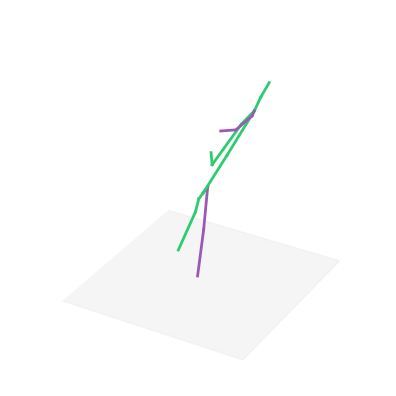

In [42]:
# main
enc_in = np.zeros((1, 64))
enc_in[0] = [0 for i in range(64)]

zscore = lambda x: (x - x.mean()) / x.std()

tf.reset_default_graph()
number = 0
device_count = {"GPU": 0}

with tf.Session(config=tf.ConfigProto(
        device_count=device_count,
        allow_soft_placement=True)) as sess:
    batch_size = 128
    model = create_model(sess, actions, batch_size)
    print('model loaded')
    
    # for fileNo in range(1100):
        # print(fileNo)
        # csvName = 'csv_median/median{0:06d}.csv'.format(fileNo+1)
    
    # load csv data
    data_dir = '../../data/'
    file_list = os.listdir(data_dir)[1:5]
    csvName = data_dir + file_list[2]
    df = pd.read_csv(csvName, header=None)
    # 平滑化してみる
    df = df.rolling(window=4, min_periods=2).mean()
    print('length: ', len(df))
    print('open: ', csvName)
#     for i in tqdm(range(len(df.iloc[0, :]))):
#         if i % 3 == 0:
#             df[i] = pd.DataFrame(df[i]).apply(zscore)
#         elif i % 3 == 1:
#             df[i] = pd.DataFrame(df[i]).apply(zscore)
#         else:
#             pass
        
    df_array = np.array(df)

    for line in tqdm(range(len(df_array))):
        enc_in = np.zeros((1, 64))
        enc_in[0] = [0 for i in range(64)]
        
        tmp = df_array[line]
        for i in range(len(order)):
            for j in range(2):
                enc_in[0][order[i] * 2 + j] = tmp[i * 3 + j]
    
        for j in range(2):
            # Hip
            enc_in[0][0 * 2 + j] = (enc_in[0][1 * 2 + j] + enc_in[0][6 * 2 + j]) / 2
            # Neck/Nose
            enc_in[0][14 * 2 + j] = (enc_in[0][15 * 2 + j] + enc_in[0][12 * 2 + j]) / 2
            # Thorax
            enc_in[0][13 * 2 + j] = 2 * enc_in[0][12 * 2 + j] - enc_in[0][14 * 2 + j]    

        spine_x = enc_in[0][24]
        spine_y = enc_in[0][25]
        
        num_rhip = 1
        num_lhip = 6
#         move_x = (enc_in[0][num_rfoot*2] + enc_in[0][num_lfoot*2] + enc_in[0][num_head*2]) / 3 - 400
#         move_y = (enc_in[0][num_rfoot*2+1] + enc_in[0][num_lfoot*2+1] + enc_in[0][num_head*2+1]) / 3 - 400
        move_x = (enc_in[0][num_rhip*2] + enc_in[0][num_lhip*2]) / 2 - 400
        move_y = (enc_in[0][num_rhip*2+1] + enc_in[0][num_lhip*2+1]) / 2 - 400

        for i in order:
            enc_in[0][i*2] -= move_x
            enc_in[0][i*2+1] -= move_y
        for i in order_plus:
            enc_in[0][i*2] -= move_x
            enc_in[0][i*2+1] -= move_y
        
        
        enc_in = enc_in[:, dim_to_use_2d]
        mu = data_mean_2d[dim_to_use_2d]
        stddev = data_std_2d[dim_to_use_2d]
        enc_in = np.divide((enc_in - mu), stddev)
#         print('mine', enc_in[0])

        dp = 1.0
        dec_out = np.zeros((1, 48))
        dec_out[0] = [0 for i in range(48)]
        _, _, poses3d = model.step(sess, enc_in, dec_out, dp, isTraining=False)

        # enc_in = data_utils.unNormalizeData(enc_in, data_mean_2d, data_std_2d, dim_to_ignore_2d)
        poses3d = data_utils.unNormalizeData(poses3d, data_mean_3d, data_std_3d, dim_to_ignore_3d)

        gs1 = gridspec.GridSpec(1, 1)
        gs1.update(wspace=-0.00, hspace=0.05)  # set the spacing between axes.
        plt.axis('off')

        subplot_idx, exidx = 1, 1

#         max = 0
#         min = 10000
#         for i in range(poses3d.shape[0]):
#             for j in range(32):
#                 # 座標の入れ替え
#                 tmp = poses3d[i][j * 3 + 2]
#                 poses3d[i][j * 3 + 2] = poses3d[i][j * 3 + 1]
#                 poses3d[i][j * 3 + 1] = tmp
#                 if poses3d[i][j * 3 + 2] > max:
#                     max = poses3d[i][j * 3 + 2]
#                 if poses3d[i][j * 3 + 2] < min:
#                     print(poses3d[i][j * 3 + 2])
#                     min = poses3d[i][j * 3 + 2]

#         for i in range(poses3d.shape[0]):
#             for j in range(32):
#                 poses3d[i][j * 3 + 2] = max - poses3d[i][j * 3 + 2] + min
#                 poses3d[i][j * 3] += (spine_x - 630)
#                 poses3d[i][j * 3 + 2] += (500 - spine_y)

        # Plot 3d predictions
        ax3 = plt.subplot(gs1[subplot_idx - 1], projection='3d')

        if np.min(poses3d) < -4000:
             poses3d = before_pose

        p3d = poses3d
        viz.show3Dpose(p3d, ax3, lcolor="#9b59b6", rcolor="#2ecc71")

        # pngName = 'png/test{0:06d}.png'.format(fileNo+1)
        pngName = 'output/test_{0:06d}.png'.format(number+1)
        plt.savefig(pngName)

        before_pose = poses3d
        
        number += 1


In [ ]:
print(mu)
print(stddev)

In [ ]:
enc_in

In [ ]:
dim_to_use_2d